## Importaciones necesarias

In [995]:
# Para esta actividad se importarán las siguientes librerías:
'''Se importa la librería de pandas para importar la colección de datos'''
import pandas as pd
import numpy as np
from numpy import argmax
'''Se importa la librería de LabelEndocer para transformar de categórico a numérico'''
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
'''Se importa la siguiente librería para entrenamiento y prueba de la colección de datos'''
from sklearn.model_selection import train_test_split
'''Se importa la librería SVM para trabajar con el modelo SVM "(Support Vector Machine)"'''
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
'''Se importa la librería para graficar'''
import matplotlib.pyplot as plt
'''Se importa la librería para trabajar con escalamiento estándar'''
from sklearn.preprocessing import StandardScaler
'''Se importa la librería para dividir la dataset en entrenamiento y prueba'''
from sklearn.model_selection import train_test_split
'''Se importa la librería para trabajar con el método de Nayve Bayes'''
from sklearn.naive_bayes import GaussianNB
'''Se importa la librería para trabajar con el método de HMM'''
from hmmlearn import hmm
'''Se importa la librería para trabajar con las métricas de los modelos'''
from sklearn import metrics
'''Se importa la librería para trabajar con el método de Fuzzy logic'''
from fcmeans import FCM
from sklearn.decomposition import PCA

## Cargar el DataSet

In [996]:
'''Se carga la colección de datos'''
df = pd.read_csv('kdd_train.csv')

'''Se visualiza las dimensiones del dataset de entrenamiento'''
print('Dimensiones de la colección de entrenamiento:',df.shape)

Dimensiones de la colección de entrenamiento: (125973, 42)


In [997]:
'''Se visualiza los registros superiores del dataset de entrenamiento'''
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Descripción de la fuente del Dataset

In [998]:
'''Se obtiene valores estadísticos del dataset de entranamiento'''
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Se examinará los conjuntos de entrenamiento y prueba de la NSL-KDD, que proporcionan información significativa sobre los datos de los registros de tráfico de Internet. Estos conjuntos de datos contienen los registros del tráfico de Internet vistos por una simple red de detección de intrusos y se consideran un punto de referencia para el tráfico de Internet actual.
A continuación se visualiza el contenido de los conjuntos de datos:
### Características de entrada:
duration (continuo): Duración (número de segundos) de la conexión<br>
protocol_type (categorico): Tipo de protocolo, por ejemplo, tcp, udp, etc. <br>
service       (categorico): Servicio de red en el destino, por ejemplo, http, telnet, etc.<br>
flag          (categorico):  Bandera de que esta psando algo<br>
src_bytes          (continuo): Número de bytes de datos desde el origen hasta el destino<br>
dst_bytes          (continuo): Número de bytes de datos desde el origen hasta el origen<br>	
land               (discreto): 1 si la conexión es desde/hacia el mismo host/puerto; 0 de lo contrario<br> 
wrong_fragment     (continuo): Número de fracmentos incorrectos<br>
urgent             (continuo): Número de paquetes urgentes<br>
hot                (continuo): Número de indicadores "calientes"<br>
num_failed_logins  (continuo): Número de intentos fallidos de inicio de sesión<br>
logged_in          (discreto): 1 si inició sesión correctamente; 0 de lo contrario<br>
num_compromised    (continuo): Número de condiciones "comprometidas"<br>
root_shell         (discreto): 1 si se obtiene shell raíz; 0 de lo contrario<br>
su_attempted       (discreto): 1 si se intentó el comando 'su root'; 0 de lo contrario<br>
num_root           (continuo): Número de accesos 'root'<br>
num_file_creations (continuo): Número de operaciones de creación de archivos<br>
num_shells         (continuo): Número de avisos de shell<br>
num_access_files   (continuo): Número de operaciones en archivos de control de acceso<br>
num_outbound_cmds  (continuo): Número de comandos salientes en una sesión ftp<br>
is_host_login      (discreto): 1 si el inicio de sesión pertenece a la lista "caliente"; 0 de lo contrario<br>
is_guest_login     (discreto): 1 si el inicio de sesión es un inicio de sesión 'invitado'; 0 de lo contrario<br>
count              (continuo): Número de conexiones al mismo host que la conexión actual en los últimos dos segundo<br>
**Lo siguiente solo describen mejor la caracteristicas de arriba**<br>
serror_rate        (continuo): % de conexiones que tienen errores 'SYN'<br>
rerror_rate        (continuo): % de conexiones que tienen errores 'REJ'<br>
same_srv_rate      (continuo): % de conexiones al mismo servicio<br>
diff_srv_rate      (continuo): % de conexiones a diferentes servicio<br>
srv_count          (continuo): Número de conexiones al mismo servicio que la conexión actual en los últimos dos segundo<br>
**Lo siguiente solo describen mejor la caracteristicas de arriba**<br>
srv_serror_rate    (continuo): % de conexiones que tienen errores 'SYN' <br>
srv_rerror_rate    (continuo): % de conexiones que tienen errores 'REJ' <br>
srv_diff_host_rate (continuo): % de conexiones a diferentes hosts <br>
dst_host_count              (discreto): Número de inicios de sesión al mismo servicio<br>
**Lo siguiente solo describen mejor la caracteristicas de arriba**<br>
dst_host_srv_count          (discreto):  ...<br>
dst_host_same_srv_rate      continuo: ...<br>
dst_host_diff_srv_rate      continuo: ...<br>
dst_host_same_src_port_rate continuo: ...<br>
dst_host_srv_diff_host_rate continuo: ...<br>
dst_host_serror_rate        continuo: ...<br>
dst_host_srv_serror_rate    continuo: ...<br>
dst_host_rerror_rate        continuo: ...<br>
dst_host_srv_rerror_rate    continuo: ...<br>
### Variable objetivo:
labels                      (categorico): Se preocede hacer el etiquetado

Vemos que en el conjunto de entrenamiento hay 42 características por registro, de las cuales 41 se refieren a la entrada de tráfico en sí misma y una característica de etiqueta se refiere al tipo de actividad del registro.

También vemos que parece que hay algunos "grupos" de características distintos y que nos dan algunas pistas sobre cómo podríamos manipular nuestros datos para la construcción del modelo; concretamente:

Características categóricas: Algunas características tienen valores nombrados que identifican algo en la característica, como protocol_type que nos dice que el protocolo está ocurriendo en la observación o flag que identifica qué bandera ocurre durante este registro. Para estas características, lo más probable es que tengamos que codificarlas en un solo paso.
Características de recuento numérico: Características como duración, src_bytes, dst_bytes, etc. parecen ser recuentos enteros de lo que rastrean, respectivamente.

## Problema a resolver

En todo el mundo se gastan miles de millones de dólares cada año para proporcionar seguridad a los sistemas de red y evitar
las intrusiones. Algunos consideran que la interrupción de los sistemas vitales es una grave amenaza que inhabilita el trabajo de hospitales, bancos, militares y diversos servicios de Internet en todo el mundo. Para evitar esta amenaza inminente, hay muchas soluciones posibles: una de ellas son los sistemas de detección de intrusos (IDS)

In [999]:
'''Se visualiza el total de instancias del dataset de entrenamiento'''
print(f'Total de instancias para el dataset de entrenamiento es: '+ str(df['labels'].count()))

Total de instancias para el dataset de entrenamiento es: 125973


### Distribución de las clases de la variable objetivo para las colecciones de entrenamiento y prueba

In [1000]:
print('Distribución de las clases de la característica "labels":')
print(df['labels'].value_counts())

Distribución de las clases de la característica "labels":
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64


<AxesSubplot:>

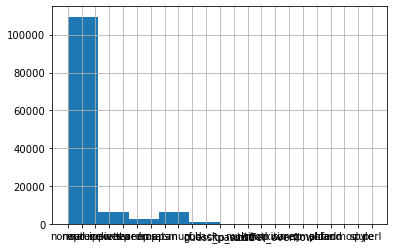

In [1001]:
%matplotlib inline
#Crear gráfico de barras como la variable objetivo (tipo) continua.
df['labels'].hist()

# Limpieza de datos

In [1002]:
'''Se visualiza el total de registros nulos del dataset de entrenamiento'''
for columna in df.columns:
    if df[columna].isnull().sum()>0:
        print(df[columna].isnull().sum())

In [1003]:
'''Se visualiza el total de registros vacíos del dataset de entrenamiento'''
for columna in df.columns:
    if df[columna].isnull().sum()>0:
        print(df[columna].isna().sum())

In [1004]:
'''Se visualiza la información de cada característica de la colección de datos'''
df.info()
'''Cuenta el número de valores únicos en la colección de datos, excluyendo el valor nulo'''
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

Se puede observar que existe un gran sesgo de información debido a la poca cantidad de registros que se tiene con en las últimas clases de la característica de "labels", teniendo una diferencia de 67341 registros en relación con la clase más popular. Por este motivo, se requiere cambiar de una clasificación multiclase a binaria, siendo necesario agrupar todos los registros con tráfico de red benigno y todos los demás será agrupados en una sola clase que identificará el tráfico de red maligno.

In [1005]:
'''Se imprime las clases/categorías de cada característica categórica del dataset de entrenamiento mediante un ciclo for'''
print('Colección de entrenamiento:')
'''Se recorre cada una de las características del dataset de entrenamiento'''
for col_name in df.columns:
    '''Se evalúa si la característica actual tiene tipo de dato "object"'''
    if df[col_name].dtypes == 'object' :
        '''Se contabiliza los valores únicos de esa caracterísica'''
        unique_cat = len(df[col_name].unique())
        '''Se imprime los resultados obtenidos'''
        print("Característica '{col_name}' tiene {unique_cat} categorías".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribución de las categorías en el servicio:')
'''Se imprime el total de instancias por categoría de la característica "service" de mayor a menor'''
print(df['service'].value_counts().sort_values(ascending=False).head())

Colección de entrenamiento:
Característica 'protocol_type' tiene 3 categorías
Característica 'service' tiene 70 categorías
Característica 'flag' tiene 11 categorías
Característica 'labels' tiene 23 categorías

Distribución de las categorías en el servicio:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


## Transformar las características categóricas de entrada a numériicas utilizando LabelEncoder

In [1006]:
le = LabelEncoder()
df['protocol_type'] = encoder.fit_transform(df['protocol_type'])
df['service'] = encoder.fit_transform(df['service'])
df['flag'] = encoder.fit_transform(df['flag'])

In [1007]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [1008]:
df.labels.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

## Transformar la colección a clasificación binaria

In [1009]:
labels = []
for i in df.labels :
  if i == 'normal':
    labels.append(0)
  else:
    labels.append(1)
df['label'] = labels

In [1010]:
df.drop('labels',axis = 1,inplace = True)

In [1011]:
normal = df.loc[:, 'label'] == 0
df_normal = df.loc[normal]
df_normal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
12,0,1,24,9,287,2251,0,0,0,0,...,219,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,0,1,54,9,2233,365,0,0,0,0,...,2,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0
125967,0,1,24,9,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.00,0.00,0.00,0
125969,8,2,49,9,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0
125970,0,1,54,9,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0


In [1012]:
otros = df.loc[:, 'label'] == 1
df_otros = df.loc[otros]
df_otros

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
5,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,1
6,0,1,49,5,0,0,0,0,0,0,...,9,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
7,0,1,49,5,0,0,0,0,0,0,...,15,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1
8,0,1,51,5,0,0,0,0,0,0,...,23,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125958,0,1,49,5,0,0,0,0,0,0,...,4,0.02,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
125964,0,1,49,5,0,0,0,0,0,0,...,12,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1
125966,0,1,49,5,0,0,0,0,0,0,...,13,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1
125968,0,1,49,5,0,0,0,0,0,0,...,25,0.10,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1


### Under Sampling para el balanceo de datos

In [1013]:
df_otros2 = df_otros.sample(n=len(df_normal), replace=True, random_state=101)
df_sampling = pd.concat([df_normal,df_otros2],axis=0)
df_sampling.label.value_counts()

0    67343
1    67343
Name: label, dtype: int64

In [1014]:
df_sampled = df_sampling.sample(n = 3000)
df_sampled.label.value_counts()

0    1513
1    1487
Name: label, dtype: int64

## Selección de características con PCA

In [1041]:
std = StandardScaler()
# Normalizamos los datos de entrenamiento
std_X_train = std.fit_transform(X_train)

y = df_sampled["label"]
X = df_sampled.drop("label", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

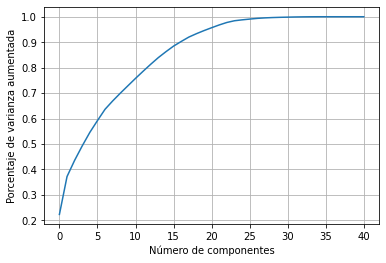

In [1043]:
std_X_test = std.transform(X_test)

pca = PCA(n_components = std_X_test.shape[1])
pca_data = pca.fit_transform(std_X_train)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("Número de componentes")
plt.ylabel("Porcentaje de varianza aumentada")
plt.show()

In [1044]:
t_X_train = pca.fit_transform(std_X_train)
t_X_train.shape

(2100, 41)

In [1045]:
cumm_var_explained

array([0.22349463, 0.37220534, 0.43603848, 0.49281438, 0.54589495,
       0.59208622, 0.63665679, 0.66924414, 0.69961313, 0.72879461,
       0.75783717, 0.78593325, 0.81336265, 0.83950695, 0.86274641,
       0.88460836, 0.90274313, 0.92001544, 0.93336686, 0.94555918,
       0.95686934, 0.9677729 , 0.97745047, 0.9842281 , 0.98777547,
       0.99079368, 0.9936158 , 0.99551018, 0.99682134, 0.99772801,
       0.99844211, 0.99911165, 0.99957675, 0.99986898, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [1046]:
sum(pca.explained_variance_ratio_)

0.9999999999999998

In [1047]:
pca = PCA(n_components=15, random_state = 10)
pca_train_data = pca.fit_transform(std_X_train)
pca_test_data = pca.transform(std_X_test)

In [1059]:
df_train_pca = pd.DataFrame(pca_train_data)
df_train_pca["label"] = y_train

corr = df_train_pca.corr()
plt.figure(figsize = (6,8))

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_10816\577533390.py:2: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  df_train_pca["label"] = y_train


ValueError: cannot reindex on an axis with duplicate labels

# Preprocesamiento de datos:

In [1052]:
VariablesEntrada = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]
VariableObjetivo = ["label"]

In [1053]:
X=df_sampled[VariablesEntrada].values
y=df_sampled[VariableObjetivo].values

In [1054]:
### Estandarización de la data ###
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [1057]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [1058]:
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del conjunto de datos de entrenamiento y datos de prueba

In [1024]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1025]:
print(f'Dimensión de x_train: '+str(X_train.shape))
print(f'Dimensión de y_train: '+str(y_train.shape))
print(f'Dimensión de x_test: '+str(X_test.shape))
print(f'Dimensión de y_test: '+str(y_test.shape))

Dimensión de x_train: (2100, 41)
Dimensión de y_train: (2100, 1)
Dimensión de x_test: (900, 41)
Dimensión de y_test: (900, 1)


# Modelos predictivos

## Naive Bayes

In [1061]:
'''Se genera le modelo de Naive Bayes'''
modelo_nb =  GaussianNB()
modelo_nb.fit(X_train, y_test)
y_nb = modelo.predict(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [2100, 900]

### Análisis del modelo Naive Bayes

In [1062]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_nb))
print("\nClasificación\nReporte",classification_report(y_test,y_nb))

ValueError: Found input variables with inconsistent numbers of samples: [900, 600]

In [1063]:
'''Se genera la matriz de confusión con el modelo Naive Bayes'''
sns.heatmap(confusion_matrix(y_test,y_nb), annot=True)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [900, 600]

## Hidden Markov Model

In [1064]:
# Instanciamos el modelo Hidden Markov Model
model_hmm = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 50, random_state = 42)

# Entrenamos el modelo con los datos de entrenamiento
model_hmm.fit(X_train)
# realizamos la prueba de predicción del model
y_pred_hmm = model_hmm.predict(X_test)

In [1065]:
# Mostramos el accuracy del modelo Hidden Markov Model
print("Accuracy Hidden Markov Model:", metrics.accuracy_score(y_test, y_pred_hmm))
print("\nClasificación\nReporte",classification_report(y_test,y_pred_hmm))

Accuracy Hidden Markov Model: 0.5211111111111111

Clasificación
Reporte               precision    recall  f1-score   support

           0       0.52      1.00      0.69       469
           1       0.00      0.00      0.00       431

    accuracy                           0.52       900
   macro avg       0.26      0.50      0.34       900
weighted avg       0.27      0.52      0.36       900



C:\Users\Personal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Personal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Personal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


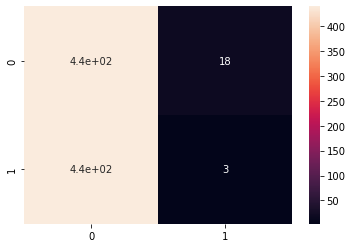

In [1030]:
'''Se genera la matriz de confusión con el modelo Hidden Markov'''
sns.heatmap(confusion_matrix(y_test,y_pred_hmm), annot=True)
plt.show()

## Fuzzy Logic

In [1031]:
modelo_fuzzy = FCM(n_clusters=2,init=1.7,random_state=0, fuzzifier=2) #Seleccionamos 4 cluster
modelo_fuzzy.fit(x)

In [1032]:
centers = modelo_fuzzy.centers
y_pred_fuzzy = modelo_fuzzy.predict(X_test)

In [1034]:
# Mostramos el accuracy del modelo Fuzzy logic
print("Accuracy Fuzzy logic:", metrics.accuracy_score(y_test, y_pred_fuzzy))
print("\nClasificación\nReporte",classification_report(y_test,y_pred_fuzzy))

Accuracy Fuzzy logic: 0.53

Clasificación
Reporte               precision    recall  f1-score   support

           0       0.52      0.97      0.68       457
           1       0.70      0.08      0.14       443

    accuracy                           0.53       900
   macro avg       0.61      0.52      0.41       900
weighted avg       0.61      0.53      0.41       900



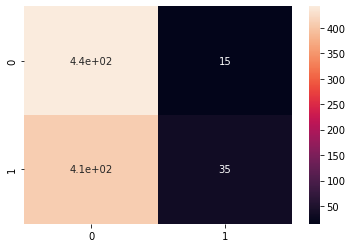

In [1035]:
'''Se genera la matriz de confusión con el modelo Fuzzy Logic'''
sns.heatmap(confusion_matrix(y_test,y_pred_fuzzy), annot=True)
plt.show()

### Reducción de características de entrada con PCA

In [1060]:
from sklearn.ensemble import VotingClassifier
pca = PCA(n_components=2)
_ = pca.fit(X_train)  
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)  

eclf = VotingClassifier(estimators=[('Naive Bayes', modelo_nb), ('Hidden Markov', model_hmm),('Fuzzy Logic',modelo_fuzzy)], voting='hard')
_ = eclf.fit(X_train_pca,y_train)

pred = eclf.score(X_test_pca,y_test)
print("Acc: %0.10f" % (pred))
print("nubmer of features",X_train_pca.shape[1])

ValueError: The estimator GaussianHMM should be a classifier.